# The Obligatory Part

In [ ]:
# Run this cell if data in Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install ortools
!pip3 install ortools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 26.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 5.26.1 which is incompatible.
google-ai-generativelanguage 0.6.2 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have proto

In [ ]:
# Import library
import numpy as np
import pandas as pd
import math
from ortools.sat.python import cp_model
import matplotlib.pyplot as plt

# Define the Data Structure

In [ ]:
# Data path
new_employee_path = '/content/drive/MyDrive/Tadika Mesra Bunga Matahari/#1 Optimization Problem/project1_task-assignment/data/fixed/fixed_data_employee.csv'
new_task_path = '/content/drive/MyDrive/Tadika Mesra Bunga Matahari/#1 Optimization Problem/project1_task-assignment/data/fixed/fixed_data_task.csv'

## Pre-Processing: Employee Data

In [ ]:
# Read data
employee_skills_df = pd.read_csv(new_employee_path, index_col='employee_id').fillna(0)
employee_skills_df.drop(columns=['no', 'Role'], inplace=True, errors='ignore')

employees = employee_skills_df.index.tolist()
skills_name = employee_skills_df.columns[1:].tolist()

employee_skills_df

,No,Mathematics.Linear Algebra,Mathematics.Differential Equations,Mathematics.Optimization Technique,Mathematics.Calculus,Mathematics.Combinatorics & Graph,Statistics & Probabilities.Statistics,Statistics & Probabilities.Probability & Sampling,Statistics & Probabilities.Bayessian Method,Statistics & Probabilities.Hypothesis Testing,...,Data & Cloud Engineering.Data Security & Privacy,Data & Cloud Engineering.Distributed Systems,"Data & Cloud Engineering.Monitoring, Logging, Alerting",MLOPS.ML Lifecycle,MLOPS.ML Model Pipeline,MLOPS.Model Versioning,MLOPS.Automated Testing & Validation,MLOPS.Scalable Model Training,"MLOPS.Model Deployment, Monitoring, Logging",MLOPS.Ethical AI & Bias Mitigation
employee_id,,,,,,,,,,,,,,,,,,,,,
Talent 1,1,1,1,2,1,2,3,3,2,2,...,1,1,1,2,1,1,1,1,1,2
Talent 2,2,4,4,4,4,3,5,4,3,3,...,3,2,1,1,1,1,1,1,1,1
Talent 3,3,3,2,2,3,2,3,3,2,2,...,3,3,3,3,2,3,2,3,3,2
Talent 4,4,3,2,3,2,3,4,3,2,4,...,3,1,1,2,2,2,2,2,2,2
Talent 5,5,2,1,3,1,1,1,2,1,1,...,2,1,1,3,2,5,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Talent 107,105,1,4,4,3,4,3,4,4,4,...,5,5,5,3,5,3,4,3,4,2
Talent 108,106,3,3,3,3,4,2,2,2,2,...,4,3,4,2,3,3,2,2,3,2
Talent 109,107,5,5,4,5,3,4,4,3,3,...,5,5,5,5,5,5,5,5,5,5


## Pre-Processing: Task Data

In [ ]:
task_df = pd.read_csv(new_task_path, index_col='task_id').fillna(0)

tasks = task_df.index.tolist()
company_names = list(set(task_df['project_id']))
story_points = task_df['story_points'].to_dict()

task_df

,project_id,story_points,Mathematics.Linear Algebra,Mathematics.Differential Equations,Mathematics.Optimization Technique,Mathematics.Calculus,Mathematics.Combinatorics & Graph,Statistics & Probabilities.Statistics,Statistics & Probabilities.Probability & Sampling,Statistics & Probabilities.Bayessian Method,...,Data & Cloud Engineering.Data Security & Privacy,Data & Cloud Engineering.Distributed Systems,"Data & Cloud Engineering.Monitoring, Logging, Alerting",MLOPS.ML Lifecycle,MLOPS.ML Model Pipeline,MLOPS.Model Versioning,MLOPS.Automated Testing & Validation,MLOPS.Scalable Model Training,"MLOPS.Model Deployment, Monitoring, Logging",MLOPS.Ethical AI & Bias Mitigation
task_id,,,,,,,,,,,,,,,,,,,,,
T1,P5,8,2,1,1,0,1,4,2,3,...,5,3,0,2,2,2,2,2,0,0
T2,P1,1,3,2,2,3,2,5,2,3,...,4,5,0,1,0,2,0,5,2,5
T3,P5,2,3,5,4,5,5,1,0,5,...,5,3,4,4,5,1,4,3,3,3
T4,P1,3,0,3,3,5,4,5,5,2,...,2,4,0,1,1,3,5,0,5,0
T5,P2,5,0,2,2,4,4,2,5,0,...,2,1,5,4,1,0,4,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T296,P5,5,0,3,3,3,0,1,3,1,...,5,3,0,1,4,3,1,1,5,1
T297,P2,8,1,0,1,3,0,5,3,1,...,4,3,1,2,5,4,1,5,0,1
T298,P2,2,5,0,4,5,1,5,1,1,...,3,1,2,0,2,1,0,5,0,5


In [ ]:
# convert to dictionary each company and its task
company_tasks = {}

for company in company_names:
  company_tasks[company] = task_df[task_df['project_id'] == company].index.tolist()

# sort the company tasks from C1 to C5
company_tasks = dict(sorted(company_tasks.items()))

company_tasks_df = pd.DataFrame.from_dict(company_tasks, orient='index')
company_tasks_df

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
P1,T2,T4,T14,T21,T26,T29,T30,T36,T38,T40,...,None,None,None,None,None,None,None,None,None,None
P2,T5,T6,T9,T11,T19,T28,T32,T33,T44,T46,...,T260,T265,T274,T279,T283,T291,T293,T297,T298,T299
P3,T10,T23,T24,T25,T34,T48,T53,T58,T59,T68,...,T285,T286,T287,T289,T300,None,None,None,None,None
P4,T15,T20,T35,T37,T39,T43,T56,T57,T61,T70,...,None,None,None,None,None,None,None,None,None,None
P5,T1,T3,T7,T8,T12,T13,T16,T17,T18,T22,...,T241,T242,T243,T268,T276,T280,T282,T288,T296,None


In [ ]:
task_skills_df = task_df.drop(columns=['project_id', 'story_points'])
task_skills_df.head()

,Mathematics.Linear Algebra,Mathematics.Differential Equations,Mathematics.Optimization Technique,Mathematics.Calculus,Mathematics.Combinatorics & Graph,Statistics & Probabilities.Statistics,Statistics & Probabilities.Probability & Sampling,Statistics & Probabilities.Bayessian Method,Statistics & Probabilities.Hypothesis Testing,Statistics & Probabilities.A/B Testing,...,Data & Cloud Engineering.Data Security & Privacy,Data & Cloud Engineering.Distributed Systems,"Data & Cloud Engineering.Monitoring, Logging, Alerting",MLOPS.ML Lifecycle,MLOPS.ML Model Pipeline,MLOPS.Model Versioning,MLOPS.Automated Testing & Validation,MLOPS.Scalable Model Training,"MLOPS.Model Deployment, Monitoring, Logging",MLOPS.Ethical AI & Bias Mitigation
task_id,,,,,,,,,,,,,,,,,,,,,
T1,2,1,1,0,1,4,2,3,1,5,...,5,3,0,2,2,2,2,2,0,0
T2,3,2,2,3,2,5,2,3,0,0,...,4,5,0,1,0,2,0,5,2,5
T3,3,5,4,5,5,1,0,5,2,0,...,5,3,4,4,5,1,4,3,3,3
T4,0,3,3,5,4,5,5,2,2,2,...,2,4,0,1,1,3,5,0,5,0
T5,0,2,2,4,4,2,5,0,5,2,...,2,1,5,4,1,0,4,3,5,4


## Pre-Processing: Calculate The Similarity Error

### Weighted Euclidean Method

**Weight Formula**

$$
w_i = \frac{1}{1 + a \cdot max(0, v_{1i} - v_{2i})}
$$

Where:

* $w_i$ is the weight for the *i*-th element.
* $v_{1i}$ is the *i*-th element of the first vector.
* $v_{2i}$ is the *i*-th element of the second vector.
* $a$ is a weighting parameter

<br>
<br>

**Weighted Euclidean Distance Formula**

$$
d(v_1, v_2) = \sqrt{\sum_{i=1}^n w_i (v_{1i} - v_{2i})^2}
$$

Where:
* $d(v_1, v_2)$ is the weighted Euclidean distance between vectors $v_1$ and $v_2$.
* $w_i$ is the weight for the *i*-th element.
* $v_{1i}$ is the *i*-th element of the first vector.
* $v_{2i}$ is the *i*-th element of the second vector.
* $n$ is the dimensionality of the vectors.

In [ ]:
def custom_we(v1, v2, a=0.5):
  # calculate differences
  diff = v1 - v2

  # adjust weight: over qualified only
  w = 1 / (1 + a * np.maximum(0, diff))

  return w

def euclidean_similarity(emp, task):
  sum = 0
  for index, metric in enumerate(emp):
    if task[index] > 0: # if the skill criteria is not 0
      w = custom_we(emp[index], task[index]) # create weight
      sum += w * ((emp[index] - task[index])**2)
    elif task[index] == 0: # else it is, then we don't take account of this aspect
      sum += 0

  return math.sqrt(sum)


In [ ]:
# Calculate the eucliean similarity
highest_euclidean_score = 40.311288741492746
euclidean_similarity_score = {}
count_no_match = 0

for i in tasks:
  task_skills = task_skills_df.loc[i]

  for j in employees:
    employee_skills = employee_skills_df.loc[j]

    # Filter skills to consider only those present in both project requirements and employee skills
    common_skills = [skill for skill in employee_skills.index if skill in task_skills.index]

    # check if there's at least one skill matching
    if common_skills:
      # calculate weighted euclidean distance for common skills
      euclidean_similarity_score[(i, j)] = euclidean_similarity(employee_skills[common_skills], task_skills[common_skills]) # compute euclidean distance
      euclidean_similarity_score[(i, j)] = euclidean_similarity_score[(i, j)] / highest_euclidean_score
    else:
      count_no_match += 1

print(count_no_match)

euclidean_similarity_score_df = pd.DataFrame.from_dict(euclidean_similarity_score, orient='index')
euclidean_similarity_score_df

0


,0
"(T1, Talent 1)",0.321535
"(T1, Talent 2)",0.273477
"(T1, Talent 3)",0.253792
"(T1, Talent 4)",0.286947
"(T1, Talent 5)",0.384254
...,...
"(T300, Talent 107)",0.258358
"(T300, Talent 108)",0.248483
"(T300, Talent 109)",0.237163
"(T300, Talent 110)",0.231650


In [ ]:
employee_skills_df.loc['Talent 6']

No                                             6.0
Mathematics.Linear Algebra                     3.0
Mathematics.Differential Equations             3.0
Mathematics.Optimization Technique             3.0
Mathematics.Calculus                           2.0
                                              ... 
MLOPS.Model Versioning                         2.0
MLOPS.Automated Testing & Validation           3.0
MLOPS.Scalable Model Training                  2.0
MLOPS.Model Deployment, Monitoring, Logging    3.0
MLOPS.Ethical AI & Bias Mitigation             2.0
Name: Talent 6, Length: 66, dtype: float64

# 2. Construct the Model

In [ ]:
model = cp_model.CpModel()

# 3. Build the Decision Variable

We have 3 sets
$$
sets=\begin{cases}I\:&,\:set\:of\:task\\ J&,\:set\:of\:employee\\ K&,\:set\:of\:project\end{cases}
$$

then we have parameters, scalars, and data structures. so let:
$$
i\:=\:task \:i \\
j=employee \:j\\
k=projects \:k\\
s_i=story\:points\:of\:task \:i \\
e_{ij}=similarity\:skills\:of\:employee\:j\:for\:task\:i \\
$$



Decision Variable

$$
x_{ijk}=Binary\:variable\:indicating\:whether\:employee\:j\:is\:assigned\:to\:task\:k\:for\:day\:i
$$
$$
y_{jk}=Binary\:variable\:indicating\:whether\:employee\:j\:is\:assigned\:to\:any\:task\:from\:company\:k
$$

In [ ]:
max_employee_workload = 20

In [ ]:
# Create decision variables for x and y
x = {}
for k, task in company_tasks.items():
    for i in task:
        for j in employees:
            x[(i, j, k)] = model.NewIntVar(0, 1, f'x_{i}_{j}_{k}')

# decision variable y represent cardinility of each employee and company
y = {}
for j in employees:
    for k in company_tasks.keys():
        y[(j, k)] = model.NewIntVar(0, 1, f'y_{j}_{k}')

# decision variables max_workload
max_workload = model.NewIntVar(0, max_employee_workload, 'max_workload')

In [ ]:
print(x)
print(y)

{('T2', 'Talent 1', 'P1'): x_T2_Talent 1_P1(0..1), ('T2', 'Talent 2', 'P1'): x_T2_Talent 2_P1(0..1), ('T2', 'Talent 3', 'P1'): x_T2_Talent 3_P1(0..1), ('T2', 'Talent 4', 'P1'): x_T2_Talent 4_P1(0..1), ('T2', 'Talent 5', 'P1'): x_T2_Talent 5_P1(0..1), ('T2', 'Talent 6', 'P1'): x_T2_Talent 6_P1(0..1), ('T2', 'Talent 7', 'P1'): x_T2_Talent 7_P1(0..1), ('T2', 'Talent 8', 'P1'): x_T2_Talent 8_P1(0..1), ('T2', 'Talent 9', 'P1'): x_T2_Talent 9_P1(0..1), ('T2', 'Talent 10', 'P1'): x_T2_Talent 10_P1(0..1), ('T2', 'Talent 11', 'P1'): x_T2_Talent 11_P1(0..1), ('T2', 'Talent 12', 'P1'): x_T2_Talent 12_P1(0..1), ('T2', 'Talent 13', 'P1'): x_T2_Talent 13_P1(0..1), ('T2', 'Talent 14', 'P1'): x_T2_Talent 14_P1(0..1), ('T2', 'Talent 15', 'P1'): x_T2_Talent 15_P1(0..1), ('T2', 'Talent 16', 'P1'): x_T2_Talent 16_P1(0..1), ('T2', 'Talent 17', 'P1'): x_T2_Talent 17_P1(0..1), ('T2', 'Talent 18', 'P1'): x_T2_Talent 18_P1(0..1), ('T2', 'Talent 19', 'P1'): x_T2_Talent 19_P1(0..1), ('T2', 'Talent 20', 'P1'): x_

# 4. Subject to the Constraint

$$
Constraint\:1:\sum _{j\:\in J}^{\:}\:x_{ij}=1\:\forall i\in I,\:k\in K
$$

In [ ]:
# constraint 1: each task assigned to one talent
for k, task in company_tasks.items():
    for i in task:
        model.Add(sum(x[(i, j, k)] for j in employees) == 1)

$$
Pre-Constraint\:2:\sum _{i\in I_k}x_{ijk}>0\:\rightarrow \:y_{jk}=1\:\forall j\in J,\:\forall k\in K\:
$$

In [ ]:
# pre-processing constraint 2
for j in employees:
    for k, task in company_tasks.items():
        # Create a temporary list to hold the sum of x[i][j][k] for all i
        temp_sum = []
        for i in task:
            temp_sum.append(x[(i, j, k)])
        # Add a constraint to the model: y[j][k] is 1 if the sum of x[i][j][k] for all i is > 0, and 0 otherwise
        model.Add(sum(temp_sum) > 0).OnlyEnforceIf(y[(j, k)])
        model.Add(sum(temp_sum) <= 0).OnlyEnforceIf(y[(j, k)].Not())

$$
Constraint\:2:\sum _{k\in K}y_{jk}\le 1\:\forall j\in J\:
$$

In [ ]:
# create constraint 2: each employee can only work on one task
for j in employees:
    # The sum of y[j][k] for all companies (k) should be <= 1
    model.Add(sum(y[(j, k)] for k in company_tasks.keys()) <= 1)

$$
Constraint\:3:\:\sum _{k\in K}\sum _{i\in I_k}s_i\cdot x_{ijk}\le 20\:\forall j\in J\:
$$

In [ ]:
# constraint 3: employee workload doesn't exceed the capacity
for j in employees:
  model.Add(sum(story_points[i] * x[i, j, k] for k, tasks in company_tasks.items() for i in tasks) <= max_employee_workload)

In [ ]:
# # constraint 4: max_workload is greater than or equal to the workload of each employee
for j in employees:
    model.Add(max_workload >= sum(story_points[i] * x[i, j, k] for k, tasks in company_tasks.items() for i in tasks))

# 5. Single Objective 1: Minimize the Idle Employee

## 5.1. Set the Objective Model

$$
I_{totalidleemployee}=\sum _{k\in K}\sum _{i\in I_{_k}}\left(1-\sum _{j\in J}\:x_{ijk}\right)\:
$$

In [ ]:
# objective 1
I = []

for j in employees:
  obj1 = 1 - sum(y[j, k] for k in company_tasks.keys())
  I.append(obj1)

I_total_idle_employee = sum(I)

# single objective 1
model.Minimize(I_total_idle_employee)

## 5.2. Solve the Model

In [ ]:
solver = cp_model.CpSolver()
status = solver.Solve(model)

In [ ]:
if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
  print('Solution Found!')
  print(f'Objective Value: {solver.ObjectiveValue()}\n')

  print(f'Total Idle Employees: {solver.Value(I_total_idle_employee)}')

  x_hat = {}

  for j in employees:
    task = []
    sim = []
    sp = 0
    wasted_sp = 0
    comp = []

    for k, tasks in company_tasks.items():
      for i in tasks:
        if solver.Value(x[i, j, k]) == 1:
          print(f'Task {i} assigned to Employee {j}')
          print(f'Company\t\t\t: {k}')
          print(f'Story Points\t\t: {story_points[i]}')
          print(f"Similarity score\t: {euclidean_similarity_score[i, j]:.10f}\n")

          task.append(i)
          sim.append(euclidean_similarity_score[i, j])
          comp.append(k)
          sp += story_points[i]

    if sp > 0:
      wasted_sp = max_employee_workload - sp
      x_hat[j] = comp, task, sp, wasted_sp, sim

else:
  print('No Solution Found!')
  x_hat = {}

Solution Found!
Objective Value: 0.0

Total Idle Employees: 0
Task T120 assigned to Employee Talent 1
Company			: P3
Story Points		: 5
Similarity score	: 0.3418801709

Task T166 assigned to Employee Talent 1
Company			: P3
Story Points		: 3
Similarity score	: 0.3859055285

Task T176 assigned to Employee Talent 1
Company			: P3
Story Points		: 1
Similarity score	: 0.3701697462

Task T197 assigned to Employee Talent 1
Company			: P3
Story Points		: 3
Similarity score	: 0.3628943478

Task T227 assigned to Employee Talent 1
Company			: P3
Story Points		: 3
Similarity score	: 0.4058545906

Task T264 assigned to Employee Talent 1
Company			: P3
Story Points		: 5
Similarity score	: 0.3654291471

Task T23 assigned to Employee Talent 2
Company			: P3
Story Points		: 1
Similarity score	: 0.3175547601

Task T115 assigned to Employee Talent 2
Company			: P3
Story Points		: 2
Similarity score	: 0.3149603150

Task T137 assigned to Employee Talent 2
Company			: P3
Story Points		: 2
Similarity score	:

## 5.3. Print the Result

In [ ]:
# Convert dictionary to DataFrame
result1 = pd.DataFrame([(key, value[0], value[1], value[2], value[3], value[4]) for key, value in x_hat.items()],
                      columns=['employee', 'company', 'assigned_task', 'sum_sp', 'wasted_sp', 'similarity_score'])

# Set 'company' as index
result1.set_index('employee', inplace=True)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

result1

,company,assigned_task,sum_sp,wasted_sp,similarity_score
employee,,,,,
Talent 1,"[P3, P3, P3, P3, P3, P3]","[T120, T166, T176, T197, T227, T264]",20,0,"[0.34188017094012824, 0.38590552849509285, 0.3..."
Talent 2,"[P3, P3, P3, P3, P3]","[T23, T115, T137, T158, T287]",8,12,"[0.31755476006670985, 0.3149603149604725, 0.31..."
Talent 3,[P3],[T154],8,12,[0.255001256909924]
Talent 4,"[P3, P3, P3, P3, P3, P3]","[T100, T202, T246, T271, T289, T300]",20,0,"[0.33077996404768023, 0.31227863954799845, 0.2..."
Talent 5,"[P1, P1]","[T179, T233]",13,7,"[0.4124722212868805, 0.4100781664074577]"
Talent 6,"[P3, P3]","[T245, T278]",13,7,"[0.2630784225478335, 0.284000722281494]"
Talent 7,"[P4, P4, P4, P4, P4]","[T20, T35, T86, T124, T262]",20,0,"[0.24389993744808447, 0.2602562839459085, 0.22..."
Talent 8,"[P2, P2, P2]","[T157, T256, T274]",18,2,"[0.25012817227194256, 0.23681649284213988, 0.2..."
Talent 9,"[P2, P2]","[T62, T127]",11,9,"[0.3077128198291055, 0.3094411836744524]"


In [ ]:
total_employee = len(employees)
total_sp = sum(story_points.values())
total_active_employee = len(set(employee for employee in x_hat.keys()))
total_active_sp = sum(value[2] for value in x_hat.values())
total_idle_employee = total_employee - total_active_employee
total_wasted_sp = total_sp - total_active_sp

print(f'Total Employee\t\t\t: {total_employee}')
print(f'Total Active Employee\t\t: {total_active_employee}\t{(total_active_employee/total_employee)*100:.2f}%')
print(f'Total Idle Employee\t\t: {total_idle_employee}\t{(total_idle_employee/total_employee)*100:.2f}%\n')
print(f'Total Story Points\t\t: {total_sp}')
print(f'Total Active Story Points\t: {total_active_sp}\t{(total_active_sp/total_sp)*100:.2f}%')
print(f'Total Wasted Story Points\t: {total_wasted_sp}\t{(total_wasted_sp/total_sp)*100:.2f}%\n')

Total Employee			: 109
Total Active Employee		: 109	100.00%
Total Idle Employee		: 0	0.00%

Total Story Points		: 1139
Total Active Story Points	: 1139	100.00%
Total Wasted Story Points	: 0	0.00%



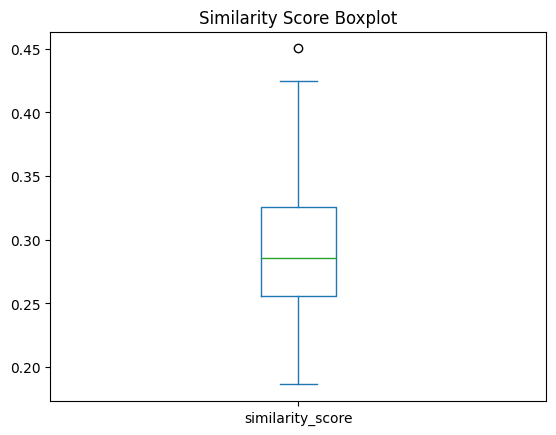

In [ ]:
# make boxplot for objective 1 variable from the similarity score
similarity_score1 = result1['similarity_score'].explode().reset_index(drop=True)
similarity_score1.plot(kind='box')
plt.title('Similarity Score Boxplot')
plt.show()

In [ ]:
similarity_score1.describe()

count     300.000000
unique    294.000000
top         0.276684
freq        2.000000
Name: similarity_score, dtype: float64

# 6. Single Objective 2: Maximize the Similarity Error

## 6.1. Set the Objective Model

$$
E_{totalsimilarity}=\sum _{k\in K}\sum _{i\in I_k}\sum _{j\in J}e_{ij}\cdot x_{ijk}\:\:\:
$$

In [ ]:
for k, tasks in company_tasks.items():
  E_total_similarity_score = sum(euclidean_similarity_score[i, j] * x[i, j, k] for i in tasks for j in employees)

model.Minimize(E_total_similarity_score)

In [ ]:
# # option 2
# E = []
# for k, tasks in company_tasks.items():
#   obj2 = sum(cosine_similarity_score[i, j] * x[i, j, k] for i in tasks for j in employees)
#   E.append(obj2)

# E_total_similarity_score = sum(E)
# model.Maximize(E_total_similarity_score)

## 6.2. Solve the Model

In [ ]:
solver = cp_model.CpSolver()
status = solver.Solve(model)

In [ ]:
if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
  print('Solution Found!')
  print(f'Objective Value: {solver.ObjectiveValue()}\n')

  print(f'Total Similarity Score: {solver.Value(E_total_similarity_score)}\n')

  x_hat = {}

  for j in employees:
    task = []
    sim = []
    sp = 0
    wasted_sp = 0
    comp = []

    for k, tasks in company_tasks.items():
      for i in tasks:
        if solver.Value(x[i, j, k]) == 1:
          print(f'Task {i} assigned to Employee {j}')
          print(f'Company\t\t\t: {k}')
          print(f'Story Points\t\t: {story_points[i]}')
          print(f"Similarity score\t: {euclidean_similarity_score[i, j]:.10f}\n")

          task.append(i)
          sim.append(euclidean_similarity_score[i, j])
          comp.append(k)
          sp += story_points[i]

    if sp > 0:
      wasted_sp = max_employee_workload - sp
      x_hat[j] = comp, task, sp, wasted_sp, sim

else:
  print('No Solution Found!')
  x_hat = {}

Solution Found!
Objective Value: 14.08171521800625

Total Similarity Score: 14.08171521800625

Task T10 assigned to Employee Talent 1
Company			: P3
Story Points		: 1
Similarity score	: 0.3154158834

Task T173 assigned to Employee Talent 1
Company			: P3
Story Points		: 3
Similarity score	: 0.3634591643

Task T191 assigned to Employee Talent 1
Company			: P3
Story Points		: 3
Similarity score	: 0.3723797345

Task T246 assigned to Employee Talent 1
Company			: P3
Story Points		: 3
Similarity score	: 0.3150905446

Task T287 assigned to Employee Talent 1
Company			: P3
Story Points		: 1
Similarity score	: 0.3105000103

Task T253 assigned to Employee Talent 2
Company			: P4
Story Points		: 3
Similarity score	: 0.2761642024

Task T281 assigned to Employee Talent 2
Company			: P4
Story Points		: 3
Similarity score	: 0.3127381144

Task T24 assigned to Employee Talent 3
Company			: P3
Story Points		: 2
Similarity score	: 0.2980277048

Task T103 assigned to Employee Talent 3
Company			: P3
Stor

## 6.3. Print the Result

In [ ]:
# Convert dictionary to DataFrame
result2 = pd.DataFrame([(key, value[0], value[1], value[2], value[3], value[4]) for key, value in x_hat.items()],
                      columns=['employee', 'company', 'assigned_task', 'sum_sp', 'wasted_sp', 'similarity_score'])

# Set 'company' as index
result2.set_index('employee', inplace=True)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

result2

,company,assigned_task,sum_sp,wasted_sp,similarity_score
employee,,,,,
Talent 1,"[P3, P3, P3, P3, P3]","[T10, T173, T191, T246, T287]",11,9,"[0.3154158833780879, 0.36345916428474345, 0.37..."
Talent 2,"[P4, P4]","[T253, T281]",6,14,"[0.27616420236277306, 0.3127381144106491]"
Talent 3,"[P3, P3, P3, P3, P3, P3]","[T24, T103, T120, T163, T228, T289]",18,2,"[0.2980277047868417, 0.25012817227194256, 0.24..."
Talent 4,"[P1, P1, P1]","[T38, T87, T128]",12,8,"[0.28334992409947724, 0.2985778256145589, 0.25..."
Talent 5,"[P1, P1, P1, P1, P1, P1]","[T4, T55, T66, T105, T149, T226]",20,0,"[0.4306226856958391, 0.32966183139229677, 0.42..."
Talent 6,"[P3, P3, P3, P3, P3, P3]","[T25, T34, T158, T182, T192, T271]",18,2,"[0.2779411485391864, 0.27310184068331617, 0.22..."
Talent 7,"[P5, P5, P5, P5, P5, P5, P5, P5]","[T22, T31, T42, T45, T77, T139, T209, T218]",20,0,"[0.1979380892589579, 0.22169510131872097, 0.19..."
Talent 8,[P1],[T2],1,19,[0.2788989339969147]
Talent 9,"[P1, P1, P1]","[T26, T238, T269]",15,5,"[0.3678907307117016, 0.2673325020768456, 0.323..."


In [ ]:
total_employee = len(employees)
total_sp = sum(story_points.values())
total_active_employee = len(set(employee for employee in x_hat.keys()))
total_active_sp = sum(value[2] for value in x_hat.values())
total_idle_employee = total_employee - total_active_employee
total_wasted_sp = total_sp - total_active_sp

print(f'Total Employee\t\t\t: {total_employee}')
print(f'Total Active Employee\t\t: {total_active_employee}\t{(total_active_employee/total_employee)*100:.2f}%')
print(f'Total Idle Employee\t\t: {total_idle_employee}\t{(total_idle_employee/total_employee)*100:.2f}%\n')
print(f'Total Story Points\t\t: {total_sp}')
print(f'Total Active Story Points\t: {total_active_sp}\t{(total_active_sp/total_sp)*100:.2f}%')
print(f'Total Wasted Story Points\t: {total_wasted_sp}\t{(total_wasted_sp/total_sp)*100:.2f}%\n')

Total Employee			: 109
Total Active Employee		: 108	99.08%
Total Idle Employee		: 1	0.92%

Total Story Points		: 1139
Total Active Story Points	: 1139	100.00%
Total Wasted Story Points	: 0	0.00%



In [ ]:
# sum all the similarity score of task from P5
result2_p5 = result2[result2['company'].apply(lambda x: 'P5' in x)]
total_similarity_score_p5 = result2_p5['similarity_score'].explode().sum()

print(f'Total Similarity Score of Task from P5: {total_similarity_score_p5}')

Total Similarity Score of Task from P5: 14.081715218006249


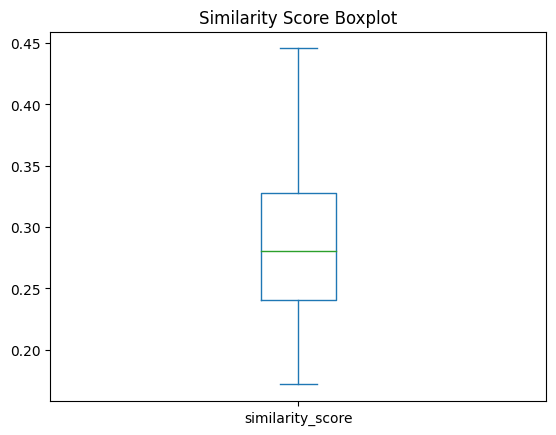

In [ ]:
# make boxplot for objective 2 variable from the similarity score
similarity_score2 = result2['similarity_score'].explode().reset_index(drop=True)
similarity_score2.plot(kind='box')
plt.title('Similarity Score Boxplot')
plt.show()

In [ ]:
# show the outlier from result
similarity_score2[similarity_score2 < 0.71]

0      0.315416
1      0.363459
2       0.37238
3      0.315091
4        0.3105
5      0.276164
6      0.312738
7      0.298028
8      0.250128
9      0.248069
10     0.274749
11      0.27956
12     0.267179
13      0.28335
14     0.298578
15     0.255644
16     0.430623
17     0.329662
18     0.424385
19      0.42453
20     0.400512
21     0.436771
22     0.277941
23     0.273102
24      0.22781
25     0.259467
26     0.301925
27      0.28958
28     0.197938
29     0.221695
30     0.192474
31     0.211563
32     0.214834
33     0.199795
34       0.2484
35     0.217397
36     0.278899
37     0.367891
38     0.267333
39     0.323189
40     0.256765
41     0.243395
42      0.22799
43      0.19554
44     0.255564
45     0.278678
46     0.274749
47     0.264401
48     0.279633
49      0.24666
50     0.258437
51     0.284938
52      0.29324
53     0.318393
54     0.328228
55     0.301177
56      0.20636
57      0.33929
58     0.340618
59      0.27542
60     0.307646
61     0.361989
62     0

# 7. Single Objective 3: Balancing the Workload

## 7.1. Set the Objective Model

$$
E_{totalsimilarity}=\sum _{k\in K}\sum _{i\in I_k}\sum _{j\in J}e_{ij}\cdot x_{ijk}\:\:\:
$$

In [ ]:
model.Minimize(max_workload)

## 7.2. Solve the Model

In [ ]:
solver = cp_model.CpSolver()
status = solver.Solve(model)

In [ ]:
if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
  print('Solution Found!')
  print(f'Objective Value: {solver.ObjectiveValue()}\n')

  print(f'Total Similarity Score: {solver.Value(E_total_similarity_score)}\n')

  x_hat = {}

  for j in employees:
    task = []
    sim = []
    sp = 0
    wasted_sp = 0
    comp = []

    for k, tasks in company_tasks.items():
      for i in tasks:
        if solver.Value(x[i, j, k]) == 1:
          print(f'Task {i} assigned to Employee {j}')
          print(f'Company\t\t\t: {k}')
          print(f'Story Points\t\t: {story_points[i]}')
          print(f"Similarity score\t: {euclidean_similarity_score[i, j]:.10f}\n")

          task.append(i)
          sim.append(euclidean_similarity_score[i, j])
          comp.append(k)
          sp += story_points[i]

    if sp > 0:
      wasted_sp = max_employee_workload - sp
      x_hat[j] = comp, task, sp, wasted_sp, sim

else:
  print('No Solution Found!')
  x_hat = {}

Solution Found!
Objective Value: 11.0

Total Similarity Score: 19.126581397665355

Task T238 assigned to Employee Talent 1
Company			: P1
Story Points		: 8
Similarity score	: 0.3121472368

Task T275 assigned to Employee Talent 1
Company			: P1
Story Points		: 3
Similarity score	: 0.3676676314

Task T259 assigned to Employee Talent 2
Company			: P2
Story Points		: 1
Similarity score	: 0.2462435734

Task T265 assigned to Employee Talent 2
Company			: P2
Story Points		: 8
Similarity score	: 0.3546034260

Task T283 assigned to Employee Talent 2
Company			: P2
Story Points		: 2
Similarity score	: 0.2993325909

Task T22 assigned to Employee Talent 3
Company			: P5
Story Points		: 1
Similarity score	: 0.2832050992

Task T31 assigned to Employee Talent 3
Company			: P5
Story Points		: 1
Similarity score	: 0.2966479395

Task T60 assigned to Employee Talent 3
Company			: P5
Story Points		: 1
Similarity score	: 0.2379398761

Task T139 assigned to Employee Talent 3
Company			: P5
Story Points		: 2

## 7.3. Print the Result

In [ ]:
# Convert dictionary to DataFrame
result3 = pd.DataFrame([(key, value[0], value[1], value[2], value[3], value[4]) for key, value in x_hat.items()],
                      columns=['employee', 'company', 'assigned_task', 'sum_sp', 'wasted_sp', 'similarity_score'])

# Set 'company' as index
result3.set_index('employee', inplace=True)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

result3

,company,assigned_task,sum_sp,wasted_sp,similarity_score
employee,,,,,
Talent 1,"[P1, P1]","[T238, T275]",11,9,"[0.31214723679042466, 0.36766763140027325]"
Talent 2,"[P2, P2, P2]","[T259, T265, T283]",11,9,"[0.2462435733900429, 0.35460342601784, 0.29933..."
Talent 3,"[P5, P5, P5, P5, P5, P5, P5]","[T22, T31, T60, T139, T168, T234, T236]",11,9,"[0.2832050991863109, 0.29664793948382656, 0.23..."
Talent 4,"[P5, P5, P5, P5]","[T18, T147, T276, T280]",11,9,"[0.2866607035754272, 0.3203843845229568, 0.325..."
Talent 5,"[P2, P2, P2, P2]","[T49, T109, T224, T291]",11,9,"[0.4227868469438447, 0.42239852369594383, 0.42..."
Talent 6,"[P2, P2, P2]","[T32, T131, T152]",11,9,"[0.26001972311779814, 0.25994082166760724, 0.2..."
Talent 7,"[P5, P5]","[T132, T288]",11,9,"[0.24840000825797914, 0.21569208822550018]"
Talent 8,"[P3, P3, P3]","[T80, T263, T264]",10,10,"[0.24432009269052696, 0.2748985826977483, 0.24..."
Talent 9,"[P1, P1]","[T189, T251]",11,9,"[0.3198076344881764, 0.3269752597870678]"


In [ ]:
total_employee = len(employees)
total_sp = sum(story_points.values())
total_active_employee = len(set(employee for employee in x_hat.keys()))
total_active_sp = sum(value[2] for value in x_hat.values())
total_idle_employee = total_employee - total_active_employee
total_wasted_sp = total_sp - total_active_sp

print(f'Total Employee\t\t\t: {total_employee}')
print(f'Total Active Employee\t\t: {total_active_employee}\t{(total_active_employee/total_employee)*100:.2f}%')
print(f'Total Idle Employee\t\t: {total_idle_employee}\t{(total_idle_employee/total_employee)*100:.2f}%\n')
print(f'Total Story Points\t\t: {total_sp}')
print(f'Total Active Story Points\t: {total_active_sp}\t{(total_active_sp/total_sp)*100:.2f}%')
print(f'Total Wasted Story Points\t: {total_wasted_sp}\t{(total_wasted_sp/total_sp)*100:.2f}%\n')

Total Employee			: 109
Total Active Employee		: 109	100.00%
Total Idle Employee		: 0	0.00%

Total Story Points		: 1139
Total Active Story Points	: 1139	100.00%
Total Wasted Story Points	: 0	0.00%



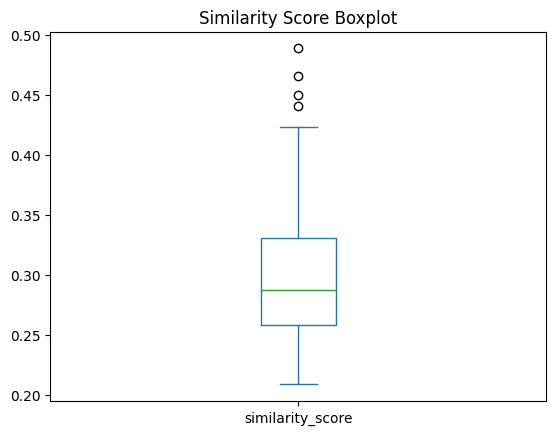

In [ ]:
# make boxplot for objective 3 variable from the similarity score
similarity_score3 = result3['similarity_score'].explode().reset_index(drop=True)
similarity_score3.plot(kind='box')
plt.title('Similarity Score Boxplot')
plt.show()

In [ ]:
# show outlier similarity score ignore NaN
# similarity_score3[similarity_score3 < 0.74]

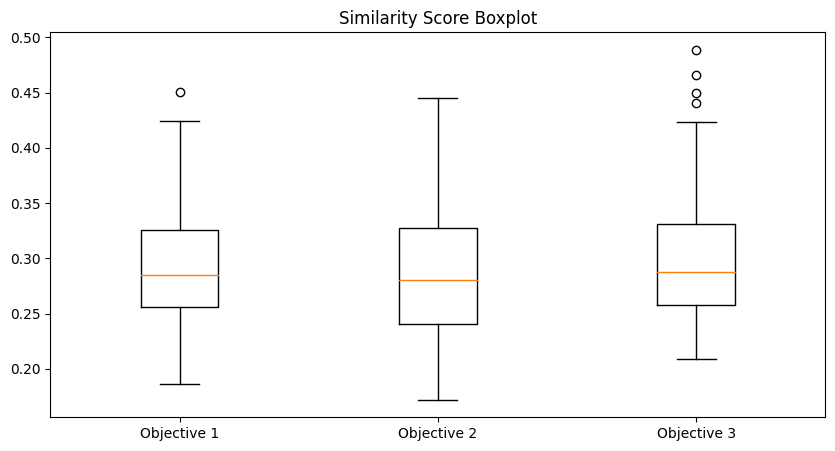

In [ ]:
# merge all boxplot in one graph
plt.figure(figsize=(10, 5))
plt.boxplot([similarity_score1, similarity_score2, similarity_score3], labels=['Objective 1', 'Objective 2' ,'Objective 3'])
plt.title('Similarity Score Boxplot')
plt.show()

# 8. Multi-Objective Approach

## 8.1. Set The Objective Model

Objective Function
$$
Minimize\left(\alpha \cdot I_{totalidleemployee}\right)+\left(\beta \cdot E_{totalsimilarity}\right)+\left(\theta \cdot E_{totalworkload}\right)
$$

In [ ]:
alpha = 0.1
beta = 0.8
theta = 0.1

In [ ]:
# # objective 1
# I = []

# for j in employees:
#   obj1 = 1 - sum(y[j, k] for k in company_tasks.keys())
#   I.append(obj1)

# I_total_idle_employee = sum(I)

# # objective 2
# for k, tasks in company_tasks.items():
#   E_total_similarity_score = sum(cosine_similarity_score[i, j] * x[i, j, k] for i in tasks for j in employees)

# # objective 3
# max_workload = model.NewIntVar(0, max_employee_workload, 'max_workload')
# # constraint 4: max_workload is greater than or equal to the workload of each employee
# for j in employees:
#     model.Add(max_workload >= sum(story_points[i] * x[i, j, k] for k, tasks in company_tasks.items() for i in tasks))

model.Minimize((alpha * I_total_idle_employee) + (beta * E_total_similarity_score) + (theta * max_workload))

## 8.2. Solve the Model

In [ ]:
solver = cp_model.CpSolver()
status = solver.Solve(model)

In [ ]:
if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
  print('Solution Found!')
  print(f'Objective Value: {solver.ObjectiveValue()}\n')

  print(f'Total Idle Employees: {solver.Value(I_total_idle_employee)}')
  print(f'Total Similarity Score: {solver.Value(E_total_similarity_score)}\n')

  x_hat = {}

  for j in employees:
    task = []
    sim = []
    sp = 0
    wasted_sp = 0
    comp = []

    for k, tasks in company_tasks.items():
      for i in tasks:
        if solver.Value(x[i, j, k]) == 1:
          print(f'Task {i} assigned to Employee {j}')
          print(f'Company\t\t\t: {k}')
          print(f'Story Points\t\t: {story_points[i]}')
          print(f"Similarity score\t: {euclidean_similarity_score[i, j]:.10f}\n")

          task.append(i)
          sim.append(euclidean_similarity_score[i, j])
          comp.append(k)
          sp += story_points[i]

    if sp > 0:
      wasted_sp = max_employee_workload - sp
      x_hat[j] = comp, task, sp, wasted_sp, sim

else:
  print('No Solution Found!')
  x_hat = {}

Solution Found!
Objective Value: 12.660552021472881

Total Idle Employees: 0
Total Similarity Score: 14.200690026841247

Task T68 assigned to Employee Talent 1
Company			: P3
Story Points		: 8
Similarity score	: 0.3767608233

Task T103 assigned to Employee Talent 1
Company			: P3
Story Points		: 2
Similarity score	: 0.3461139578

Task T227 assigned to Employee Talent 1
Company			: P3
Story Points		: 3
Similarity score	: 0.4058545906

Task T73 assigned to Employee Talent 2
Company			: P3
Story Points		: 5
Similarity score	: 0.2934498603

Task T191 assigned to Employee Talent 2
Company			: P3
Story Points		: 3
Similarity score	: 0.2965787827

Task T192 assigned to Employee Talent 2
Company			: P3
Story Points		: 5
Similarity score	: 0.3114893915

Task T53 assigned to Employee Talent 3
Company			: P3
Story Points		: 2
Similarity score	: 0.2585958137

Task T166 assigned to Employee Talent 3
Company			: P3
Story Points		: 3
Similarity score	: 0.2934498603

Task T246 assigned to Employee Tal

## 8.3. Print the Result

In [ ]:
# Convert dictionary to DataFrame
result = pd.DataFrame([(key, value[0], value[1], value[2], value[3], value[4]) for key, value in x_hat.items()],
                      columns=['employee', 'company', 'assigned_task', 'sum_sp', 'wasted_sp', 'similarity_score'])

# Set 'company' as index
result.set_index('employee', inplace=True)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

result

,company,assigned_task,sum_sp,wasted_sp,similarity_score
employee,,,,,
Talent 1,"[P3, P3, P3]","[T68, T103, T227]",13,7,"[0.3767608232668545, 0.3461139578157342, 0.405..."
Talent 2,"[P3, P3, P3]","[T73, T191, T192]",13,7,"[0.29344986030465325, 0.2965787827188155, 0.31..."
Talent 3,"[P3, P3, P3, P3]","[T53, T166, T246, T286]",11,9,"[0.25859581371668583, 0.2934498603046533, 0.22..."
Talent 4,"[P4, P4]","[T146, T212]",13,7,"[0.27571817644201996, 0.2991955025028764]"
Talent 5,"[P4, P4]","[T160, T184]",13,7,"[0.43855239724371037, 0.3534445881932229]"
Talent 6,"[P4, P4, P4, P4]","[T106, T124, T151, T254]",13,7,"[0.27197284932366095, 0.2626882719215462, 0.25..."
Talent 7,"[P5, P5, P5, P5, P5, P5, P5]","[T22, T31, T42, T45, T139, T218, T268]",13,7,"[0.1979380892589579, 0.22169510131872097, 0.19..."
Talent 8,"[P2, P2]","[T131, T165]",10,10,"[0.25330634134206464, 0.232003536666235]"
Talent 9,"[P2, P2]","[T134, T157]",13,7,"[0.2815342580602554, 0.3259070183585874]"


In [ ]:
total_employee = len(employees)
total_sp = sum(story_points.values())
total_active_employee = len(set(employee for employee in x_hat.keys()))
total_active_sp = sum(value[2] for value in x_hat.values())
total_idle_employee = total_employee - total_active_employee
total_wasted_sp = total_sp - total_active_sp

print(f'Total Employee\t\t\t: {total_employee}')
print(f'Total Active Employee\t\t: {total_active_employee}\t{(total_active_employee/total_employee)*100:.2f}%')
print(f'Total Idle Employee\t\t: {total_idle_employee}\t{(total_idle_employee/total_employee)*100:.2f}%\n')
print(f'Total Story Points\t\t: {total_sp}')
print(f'Total Active Story Points\t: {total_active_sp}\t{(total_active_sp/total_sp)*100:.2f}%')
print(f'Total Wasted Story Points\t: {total_wasted_sp}\t{(total_wasted_sp/total_sp)*100:.2f}%\n')

Total Employee			: 109
Total Active Employee		: 109	100.00%
Total Idle Employee		: 0	0.00%

Total Story Points		: 1139
Total Active Story Points	: 1139	100.00%
Total Wasted Story Points	: 0	0.00%



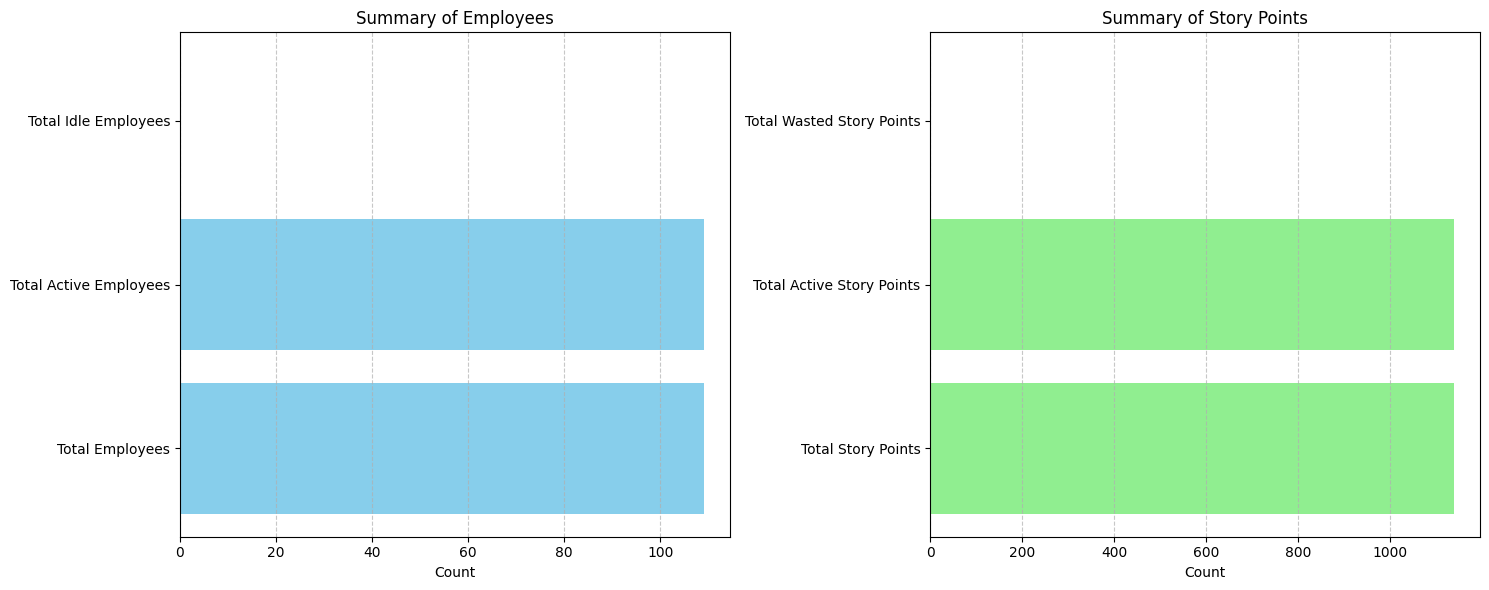

In [ ]:
# Data for employees
employee_labels = ['Total Employees', 'Total Active Employees', 'Total Idle Employees']
employee_values = [total_employee, total_active_employee, total_idle_employee]

# Data for story points
sp_labels = ['Total Story Points', 'Total Active Story Points', 'Total Wasted Story Points']
sp_values = [total_sp, total_active_sp, total_wasted_sp]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot for employees
ax1.barh(employee_labels, employee_values, color='skyblue')
ax1.set_xlabel('Count')
ax1.set_title('Summary of Employees')
ax1.grid(axis='x', linestyle='--', alpha=0.7)

# Plot for story points
ax2.barh(sp_labels, sp_values, color='lightgreen')
ax2.set_xlabel('Count')
ax2.set_title('Summary of Story Points')
ax2.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

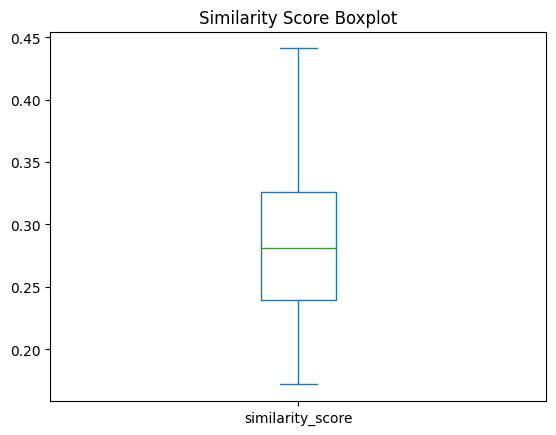

In [ ]:
# make boxplot for multi objective variable from the similarity score
similarity_score_multi = result['similarity_score'].explode().reset_index(drop=True)
similarity_score_multi.plot(kind='box')
plt.title('Similarity Score Boxplot')
plt.show()

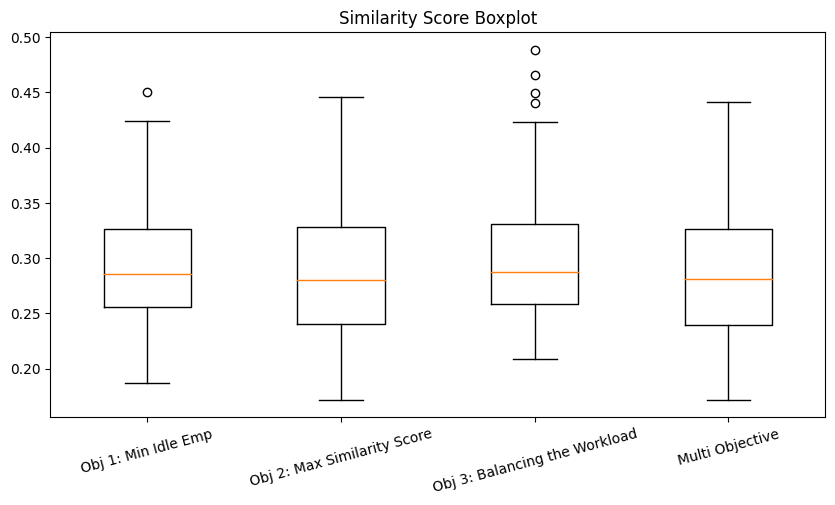

In [ ]:
# merge all boxplot in one graph
plt.figure(figsize=(10, 5))
plt.boxplot([similarity_score1, similarity_score2, similarity_score3, similarity_score_multi],
            labels=['Obj 1: Min Idle Emp', 'Obj 2: Max Similarity Score', 'Obj 3: Balancing the Workload', 'Multi Objective'])
plt.title('Similarity Score Boxplot')
plt.xticks(rotation=15)
plt.show()

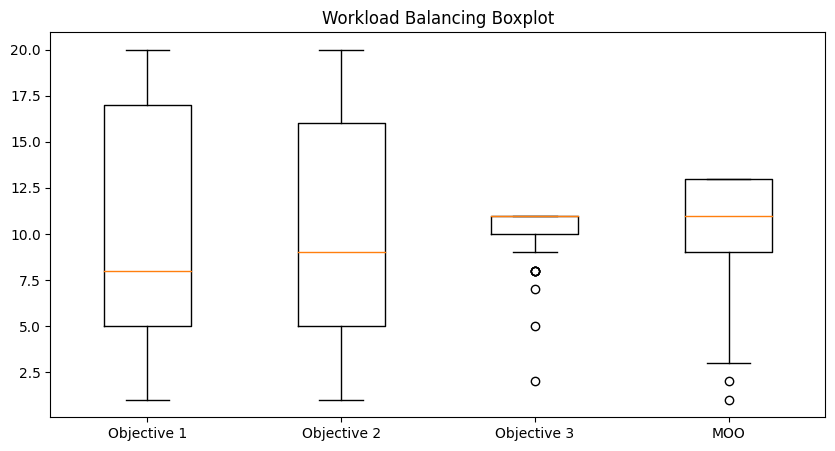

In [ ]:
# make boxplot for objective 1 variable from the similarity score
workload_1 = result1['sum_sp'].explode().reset_index(drop=True)
workload_2 = result2['sum_sp'].explode().reset_index(drop=True)
workload_3 = result3['sum_sp'].explode().reset_index(drop=True)
workload_4 = result['sum_sp'].explode().reset_index(drop=True)

# merge all boxplot in one graph
plt.figure(figsize=(10, 5))
plt.boxplot([workload_1, workload_2, workload_3, workload_4], labels=['Objective 1', 'Objective 2', 'Objective 3', 'MOO'])
plt.title('Workload Balancing Boxplot')
plt.show()

In [ ]:
Q1 = np.quantile(similarity_score_multi, 0.25)
Q3 = np.quantile(similarity_score_multi, 0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

similarity_score_multi

outliers = []

for i in range(len(similarity_score_multi)):
  if similarity_score_multi[i] < lower_bound or similarity_score_multi[i] > upper_bound:
    outliers.append(similarity_score_multi[i])


outliers

[]

In [ ]:
Q3

0.326095622209535

In [ ]:
# Explode the 'similarity_score' column to flatten the nested structure
df_expanded = result.explode('similarity_score')

# Reset index to have a clean index starting from zero
df_expanded.reset_index(drop=True, inplace=True)


# Explode the 'similarity_score' column to flatten the nested structure
df_expanded1 = result.explode('assigned_task')

# Reset index to have a clean index starting from zero
df_expanded1.reset_index(drop=True, inplace=True)

# Extract talent and similarity score into separate lists
task = df_expanded1['assigned_task']
similarity_scores = df_expanded['similarity_score']


# Create a DataFrame to associate each similarity score with its respective talent
similarity_score_per_task = pd.DataFrame({'task': task, 'similarity_score': similarity_scores})

# Show the DataFrame
print(similarity_score_per_task)


     task similarity_score
0     T68         0.376761
1    T103         0.346114
2    T227         0.405855
3     T73          0.29345
4    T191         0.296579
5    T192         0.311489
6     T53         0.258596
7    T166          0.29345
8    T246         0.229604
9    T286         0.275495
10   T146         0.275718
11   T212         0.299196
12   T160         0.438552
13   T184         0.353445
14   T106         0.271973
15   T124         0.262688
16   T151         0.258834
17   T254         0.238972
18    T22         0.197938
19    T31         0.221695
20    T42         0.192474
21    T45         0.211563
22   T139         0.199795
23   T218         0.217397
24   T268         0.217586
25   T131         0.253306
26   T165         0.232004
27   T134         0.281534
28   T157         0.325907
29   T248         0.265407
30    T60          0.19554
31    T87         0.249553
32   T266         0.297201
33    T91         0.324646
34   T108          0.29789
35   T200         0.265639
3

In [ ]:
outliers_with_tasks = []

for index, row in result.iterrows():
    for i, score in enumerate(row['similarity_score']):
        if score < lower_bound or score > upper_bound:
            outliers_with_tasks.append((index, row['assigned_task'][i], score))

# Convert list of tuples to DataFrame
outliers_df = pd.DataFrame(outliers_with_tasks, columns=['Talent', 'Task', 'Similarity Score'])

# Display outliers with tasks and similarity scores
print(outliers_df)

Empty DataFrame
Columns: [Talent, Task, Similarity Score]
Index: []


In [ ]:
# Initialize a dictionary to store the lacking skill sets for each outlier talent
talent_lacking_skills = {}

# Iterate over the outlier talents and their tasks
for talent, task, _ in outliers_df[['Talent', 'Task', 'Similarity Score']].values:
    # Get the competency requirements for the task
    # task_requirements = task_df.loc[task]
    task_requirements = task_skills_df.loc[task]

    # Get the competency of the outlier talent
    talent_competency = employee_skills_df.loc[talent]

    # Identify the lacking skill sets for the outlier talent compared to the task requirements
    lacking_skills = task_requirements[task_requirements > talent_competency].index.tolist()

    # Update the dictionary with the lacking skill sets for the outlier talent
    talent_lacking_skills.setdefault(talent, []).extend(lacking_skills)

# Display the talents and their lacking skill sets
for talent, lacking_skills in talent_lacking_skills.items():
    print(f"Talent {talent}: Lacking Skills - {lacking_skills}")

In [ ]:
# Initialize a dictionary to store the lacking skill sets for each outlier talent
task_diff_skills = {}

# Iterate over the outlier talents and their tasks
for talent, task, _ in outliers_df[['Talent', 'Task', 'Similarity Score']].values:
    # Get the competency requirements for the task
    task_requirements = task_skills_df.loc[task]

    # Get the competency of the outlier talent
    talent_competency = employee_skills_df.loc[talent]

    diff = {}

    for n in range(len(task_requirements)):
      diff[n] = task_requirements[n] - talent_competency[n]

    task_diff_skills[task, talent] = diff

task_diff_skills

{}

In [ ]:
# Display the talents and their lacking skill sets
for talent, lacking_skills in talent_lacking_skills.items():
    print(f"Talent {task}: Lacking Skills - {lacking_skills} - {task_diff_skills}")

In [ ]:
task_requirements_t = task_requirements.T

NameError: name 'task_requirements' is not defined

In [ ]:
task_requirements_t

In [ ]:
talent_competency

In [ ]:
# Initialize a dictionary to store the competencies for each outlier talent
outlier_competencies = {}

# Iterate over the outlier talents and their tasks
for talent, task, score in outliers_df[['Talent', 'Task', 'Similarity Score']].values:
    # Look up competencies associated with the task
    task_competencies = task_df.loc[task].to_dict()

    # Update the competencies for the talent
    if talent in outlier_competencies:
        outlier_competencies[talent].update(task_competencies)
    else:
        outlier_competencies[talent] = task_competencies

# Identify the competencies that the talent lacks
for talent, competencies in outlier_competencies.items():
    lacking_competencies = {comp: req for comp, req in competencies.items() if comp not in employee_skills_df.loc[talent].to_dict()}
    print(f"{talent} lacks competencies: {lacking_competencies}")


# Final Recommendation


## Initial Observation
1. Taking single objective approaches will maximize the metric it maximizes. For example, taking only the single objective approach to minimize idle employee will ensure we will get the least amount of idle employees as possible with our dataset, but ignores the other metrics.
2. Depending on the needs, generally speaking, taking a well-rounded approach (multi-objective optimization) that touches all three aspects is the most ideal approach for general use cases. However, for specifc use cases where certain objectives has to be ensured to be maximized as much as possible at the cost of the other two objectives being slightly less optimzed, the single objective approach can be considered.


## Specific Use-Cases
1. Single Objective - Minimizing the idle employee only.
- Possible Implementation
  - When the company has to prioritize that all of their employees have to work on something at the cost of less priotizing the correct task assignment and workload balancing for all employees, then this is the best approach to take
- pros
  - The number of idle employee is ensured to be as minimal as possible. Meaning that we'll try to get everyone to have at least something to work with.
  - However, other approaches should be considered even if the goal is to minimize the number of idle employees so that we can also consider the other objectives.
- cons
  - For most of the task assignment, the correctness is slightly lower compared to the single objective approach to maximize similarity score. But is quite similar to the other appraoches. We have a few employees that are forced to take on tasks that they're not really fit to do (shown by the outliers)
  - However, the workload balancing varies significantly compared to approaches where balancing the workload is also being considered. 25% of the employees are assigned so much work (16-20 story points), 25% of employees are just right (between 8-16), 50% are assigned minimal work (less than 8 story points).



  2. Single Objective - Maximizing Similarity Score only
  - Possible Implementation
    - When the company has to ensure that all of their tasks has to be completed by the best people, ensuring the speed and quality of the work only, without considering the amount of employees that are not working and the similar distribution of the workload
    - This approach is great for this exterme scenario where we would have to prioritize this significantly. A well rounded approach (multi objective) should be much considered at the cost of slightly reducing the quality of the similarity score, but with the capability to balance workload and get all employees to work.
  - Pros
    - The quality of similarity score is ensured to be as maximum as possible. 50% of the population ...
    - despite the absence of having to minimize the idle employee, we still get to get (usually) all employees to work on something

  - Cons
    - the task assignment is focused too much to maximize the similarity score. The minor improvements we are pushing by taking this approach and not the multi objective is diminishing the overall quaity of the task assignment - the idle employee is not guaranteed to be as minimum as possible, and the workload is not balanced at all. Increasing the stress level to a handful of employees while the rest aren't doing much.


  3. Single Objective - Workload Balancing
  - Possible Implementation
    - This approach is not recommended for our existing dataset. A multi-objective approach gives the same quality of workload balancing but with a more minimized idle employee and maximized smilarity score.

## Well-rounded Approach
1. Multi Objective Approach
This is a well rounded-approach. It optimizes three objectives - minimizing the idle employee, maximizing similarity score, and balancing the workload.
  - Possible Implementation
    - When the company needs to get all of their work done by the right people based on skill level, getting as much (if not all) of their employees to work on something, while at the same time making sure everyone has similar workload, then this is the best approach to take.
  - Pros
    - Idle employee has been minimized entirely. In the dataset we're using, we have 0 employees that are idle.
    - Similarity score quality is similar to the single objective approach and all employees have very similar workload. Ensuring all tasks are assigned to the best people, everyone has the same amount of work to do, but most importantly, ensuring that not only the highest skilled employees are the ones that are busy.
  - Cons
    - similarity score is slightly lower compared to the single objective approach. However, the positive aspect of this sacrifice far outweighs the cost.

